# Семинар 8. Линейная классификация

 - коллоквиум 12 апреля
 - [предварительные вопросы](https://docs.google.com/document/d/17rXxZvS1gjZUwvns-bFrh1lsR2I5HygeNKJm5ZJQd_E/edit)

### Линейный классификатор

In [1]:
from sklearn import datasets

In [17]:
import numpy as np
import pylab as plt
%matplotlib inline

Пусть у нас есть некоторая выборка $X^l$, с метками классов {-1, 1}

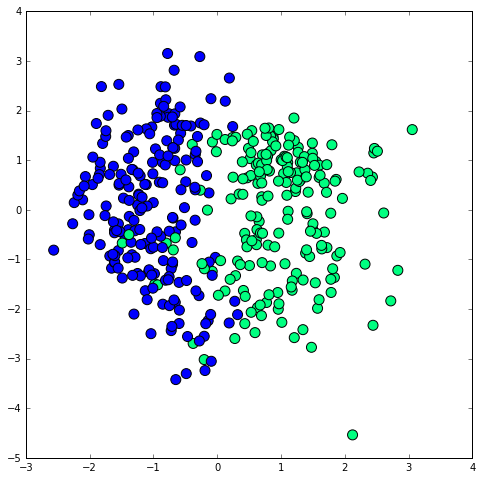

In [88]:
X, y = datasets.make_classification(400, n_features=2, n_redundant=0, n_classes=2, random_state=42)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

Вид классификатора: $ a(x) = sign(\langle w, x \rangle)$

$M_i = y_i\langle w, x_i \rangle$ — отступ на объекте $x_i$

 - $M_i < 0$ — классификатор ошибся на объекте $x_i$
 - $M_i > 0$ — классификатор не ошибся на объекте $x_i$
 
Цель: минимизировать количество ошибок классификатора, то есть

$Q(w) = \sum_{i=1}^l[M_i(w) < 0] \to \min_{w}$

Сложно решать, так как функция недиффиренцируема. Что делать? Аппроксимировать!

$Q(w) = \sum_{i=1}^l[M_i(w) < 0] \le \tilde{Q}(w)$

Например:

![](http://i.imgur.com/V9MtoLA.png)

 - $\tilde{Q}(w) = (1 - M)^2$ — квадратичная аппроксимация
 - $\tilde{Q}(w) = \log(1 + \exp(-M))$ — логистическая аппроксимация
 - $\tilde{Q}(w) = \exp(-M)$ — экспоненциальная аппроксимация
 - $\tilde{Q}(w) = \min(0, M)$ — кусочно-линейная аппроксимация

In [22]:
from sklearn.linear_model import SGDClassifier

In [93]:
def plot_decision_boundary(clf, X, y):
    clf.fit(X, y)
    plt.figure(figsize=(8, 8))
    xx1 = np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1)
    xx2 = np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1)

    X1, X2 = np.meshgrid(xx1, xx2)
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = clf.decision_function([[x1, x2]])
        Z[i, j] = p[0]
    levels = [0.0]
    linestyles = ['solid']
    colors = 'k'
    plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles, linewidths=2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

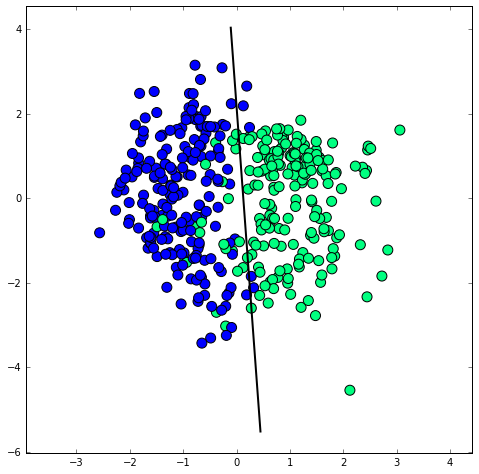

In [94]:
plot_decision_boundary(SGDClassifier(loss='hinge'), X, y)

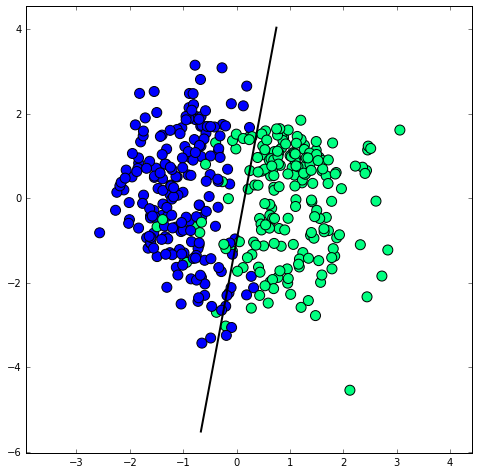

In [95]:
plot_decision_boundary(SGDClassifier(loss='log'), X, y)

Сгенерируем данные посложнее!

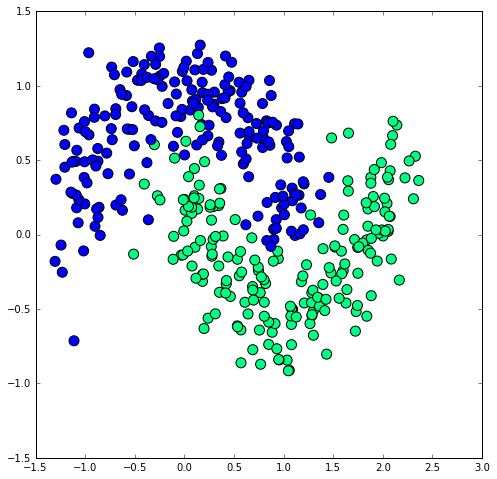

In [96]:
X, y = datasets.make_moons(400, noise=0.2, random_state=42)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

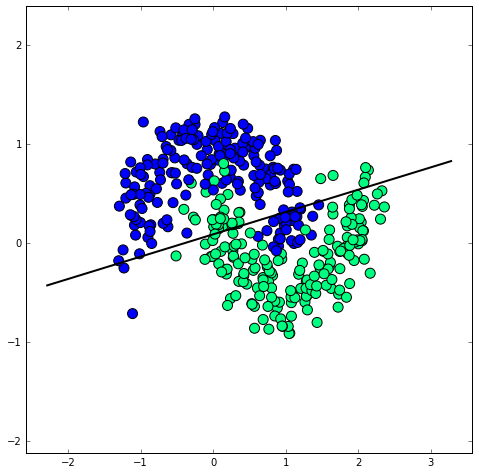

In [97]:
plot_decision_boundary(SGDClassifier(loss='hinge'), X, y)

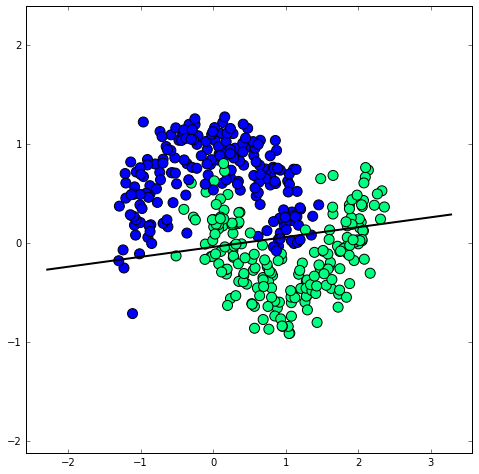

In [98]:
plot_decision_boundary(SGDClassifier(loss='log'), X, y)

Линейный классификатор строит *линейную* разделяющую гиперплоскость.

## Логистическая регрессия(?)

![](http://smotrimultiki.ru/screenshot/3704_kotenok_po_imeni_gav_1.jpg)

Логистическая регрессия — линейный классификатор с логистической аппроксимацией функции потерь:

$\tilde{Q}(w) = \dfrac{1}{l}\sum_{i=1}^l\log(1 + \exp(-y_i\langle w, x_i \rangle))$

Оосбенность: возволяет оценивать $P(y = 1|x) \approx \dfrac{1}{1 + \exp(-\langle w, x_i \rangle)}$

In [99]:
from sklearn.linear_model import LogisticRegression

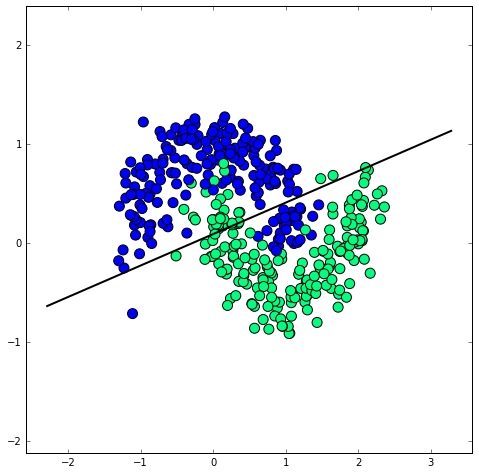

In [100]:
plot_decision_boundary(LogisticRegression(), X, y)

Аналогично предыдщим моделям, можно добавить регуляризацию:

L1: $\dfrac{1}{l}\sum_{i=1}^l\log(1 + \exp(-y_i\langle w, x_i \rangle)) + C_1\lVert w\rVert_1$

L2: $\dfrac{1}{l}\sum_{i=1}^l\log(1 + \exp(-y_i\langle w, x_i \rangle)) + C_2\lVert w\rVert_2^2$ (по умолчанию в sklearn)

Коэффициент регуляризации подбирается по кросс-валидации

[[ 1.21229852 -4.20000642]]
[[ 1.17921459 -3.71421129]]


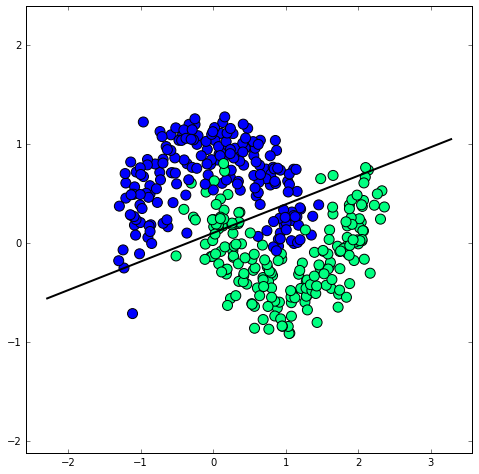

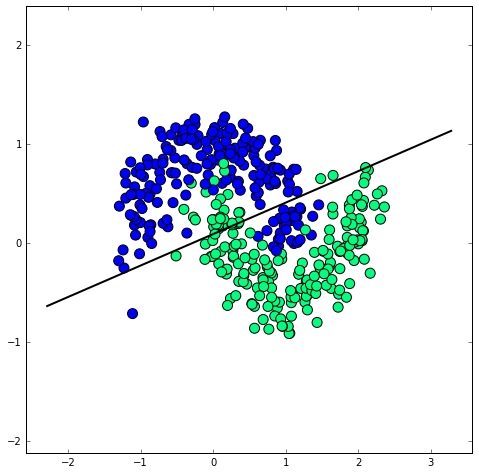

In [104]:
print LogisticRegression(penalty='l1').fit(X, y).coef_
plot_decision_boundary(LogisticRegression(penalty='l1'), X, y)

print LogisticRegression(penalty='l2').fit(X, y).coef_
plot_decision_boundary(LogisticRegression(penalty='l2'), X, y)

### Метрики качества

 - Доля неправильных ответов $\dfrac{1}{l}\sum_{i=1}^l[a(x_i) \ne y_i]$
 - Доля правильных ответов (accuracy) $\dfrac{1}{l}\sum_{i=1}^l[a(x_i) = y_i]$

Что если выборка несбалансирована?

In [105]:
import pandas as pd

In [107]:
data = pd.read_csv('spambase.data.txt', sep=',', header=None)
data.head()

0     1     2   3     4     5     6     7     8     9  ...    48     49  \
0  0.00  0.64  0.64   0  0.32  0.00  0.00  0.00  0.00  0.00 ...  0.00  0.000   
1  0.21  0.28  0.50   0  0.14  0.28  0.21  0.07  0.00  0.94 ...  0.00  0.132   
2  0.06  0.00  0.71   0  1.23  0.19  0.19  0.12  0.64  0.25 ...  0.01  0.143   
3  0.00  0.00  0.00   0  0.63  0.00  0.31  0.63  0.31  0.63 ...  0.00  0.137   
4  0.00  0.00  0.00   0  0.63  0.00  0.31  0.63  0.31  0.63 ...  0.00  0.135   

   50     51     52     53     54   55    56  57  
0   0  0.778  0.000  0.000  3.756   61   278   1  
1   0  0.372  0.180  0.048  5.114  101  1028   1  
2   0  0.276  0.184  0.010  9.821  485  2259   1  
3   0  0.137  0.000  0.000  3.537   40   191   1  
4   0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]

In [108]:
from sklearn.metrics import accuracy_score

In [115]:
from sklearn.cross_validation import cross_val_score, KFold

In [134]:
kfold = KFold(data.shape[0], n_folds=5, random_state=42)
scores = cross_val_score(LogisticRegression(random_state=42), data.values[:, :-1], data.values[:, -1], 
                         cv=kfold, scoring='accuracy')
print np.mean(scores), np.std(scores)

0.858521927961 0.0547740182138


Хорошее ли accuracy? Особенности датасета: в начале идут все письма-спам, а потом не-спам. 

In [146]:
data.values[:, -1].T

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

Поэтому нужно не забывать перемешивать данные, прежде чем делать кросс-валидацию.

In [203]:
kfold = KFold(data.shape[0], n_folds=5, shuffle=True, random_state=42)
scores = cross_val_score(LogisticRegression(random_state=42), data.values[:, :-1], data.values[:, -1], 
                         cv=kfold, scoring='accuracy')
print np.mean(scores), np.std(scores)

0.927625454374 0.00309453911269


Отличное accuracy! 

Посмотрим как часто спамные письма помечаются как не-спам:

In [219]:
def get_errors_part(clf, X, y):
    spam_errors = []
    notspam_errors = []
    for train, test in KFold(X.shape[0], n_folds=5, shuffle=True, random_state=42):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        spam_errors.append(np.mean(prediction[y_test == 1] == 0))
        notspam_errors.append(np.mean(prediction[y_test == 0] == 1))
    return np.mean(spam_errors), np.std(notspam_errors)

In [220]:
print get_errors_part(LogisticRegression(random_state=42), data.values[:, :-1], data.values[:, -1])

(0.10899768579872178, 0.0077005228437297948)


Интересно: примерно в 10% случаев мы помечаем спам как не-спам, при этом тольо в 0.7% не-спам как спам. В чем же дело?

Давайте взглянем на данные повнимательнее:

In [113]:
data[57].value_counts()

0    2788
1    1813
Name: 57, dtype: int64

Объектов "не-спам" в два раза больше, чем спама. Хотя наш классификатор имеет высокое accuracy, на объектах спама он ошибается гораздо чаще. Кажется, хочется метрику, которая бы учитывала этот факт.

Матрица ошибок:

| | y = 1 | y = 0 |
|------|------|
|   a(x) = 1  | TP| FP |
| a(x) = 0| FN | TN |


### Точность:

$precision = \dfrac{TP}{TP + FP}$

### Полнота:

$recall = \dfrac{TP}{TP + FN}$

Обратите внимание, что эти значения вычисляются относительно класса!

In [162]:
from sklearn.metrics import precision_score, recall_score, classification_report

In [226]:
def get_errors_part(clf, X, y):
    precision = []
    recall = []
    for train, test in KFold(X.shape[0], n_folds=5, shuffle=True, random_state=42):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        precision.append([precision_score(y_test, prediction, pos_label=0), 
                          precision_score(y_test, prediction, pos_label=1)])
        recall.append([recall_score(y_test, prediction, pos_label=0), 
                       recall_score(y_test, prediction, pos_label=1)])
    return { 'precision': np.mean(precision, axis=0), 
             'recall': np.mean(recall, axis=0)}

In [229]:
get_errors_part(LogisticRegression(random_state=42), data.values[:, :-1], data.values[:, -1])

{'precision': array([ 0.93177928,  0.92305763]),
 'recall': array([ 0.95161213,  0.8932386 ])}

Получилось что точность для обоих классов достаточно высокая, при этом полнота у класса спам сильно меньше.

Точность — как точно мы умеем отличать объекты данного класса, полнота — как много мы умеем их находить.

In [171]:
from sklearn.grid_search import GridSearchCV

In [230]:
gs = GridSearchCV(LogisticRegression(random_state=42), {'penalty': ['l1', 'l2'], 'C': [0.1, 1.0]}, 
                  cv=kfold, scoring='recall')
gs.fit(data.values[:, :-1], data.values[:, -1])

gs.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [182]:
from sklearn.cross_validation import train_test_split

In [184]:
X_train, X_test, y_train, y_test = train_test_split(data.values[:, :-1], data.values[:, -1], random_state=42)

In [231]:
clf = LogisticRegression(random_state=42, C=1.0, penalty='l1')
clf.fit(X_train, y_train)
print classification_report(clf.predict(X_test), y_test)

             precision    recall  f1-score   support

        0.0       0.96      0.92      0.94       706
        1.0       0.88      0.94      0.91       445

avg / total       0.93      0.93      0.93      1151



In [244]:
clf = LogisticRegression(random_state=42, C=1.0, penalty='l1')
clf.fit(X_train, y_train)
clf.predict_proba(X_test)

array([[  8.27813524e-01,   1.72186476e-01],
       [  9.02008442e-01,   9.79915582e-02],
       [  9.72455847e-01,   2.75441531e-02],
       ..., 
       [  6.99174596e-02,   9.30082540e-01],
       [  8.94746700e-01,   1.05253300e-01],
       [  9.99993031e-01,   6.96922584e-06]])

In [237]:
clf = SGDClassifier()
clf.fit(X_train, y_train)
print classification_report(clf.predict(X_test), y_test)

             precision    recall  f1-score   support

        0.0       0.30      0.98      0.46       211
        1.0       0.99      0.50      0.66       940

avg / total       0.86      0.59      0.63      1151

